Defining my variables: 
MedInc - median income in block group 
HouseAge - median house age in a block group 
AveRooms - average number of rooms per household 
Population - block group population 
AveOccup - average number of household members 
Latitude - block group latitude 
Longitude  - block group longitude 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import scipy.stats as stats 
import statsmodels.api as sm #sm functionality
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv('housing.csv') 
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].unique() #it is a categorical string variable 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
#we ask what is the change in our median house price value if we apply a one unit change 
#in our independent feature - this is MULTIPLE LINEAR REGRESSION 

In [7]:
#Check for missing values
missing_values = df.isnull().sum()

#Calculate the percentage of missing data in each column
missing_percentage = (missing_values/len(df)) * 100 

#Display the missing data stats 
print("Missing Values in each column:\n", missing_values) #would not include that as a variable in the testing data
print("\nPercentage of Missing Daat:\n", missing_percentage)

Missing Values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Daat:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [8]:
#Remove rows with missing values 
data_cleaned = df.dropna()
print(data_cleaned.isnull().sum()) #check
data = data_cleaned.copy()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [9]:
#Descriptive stats and visualization 
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


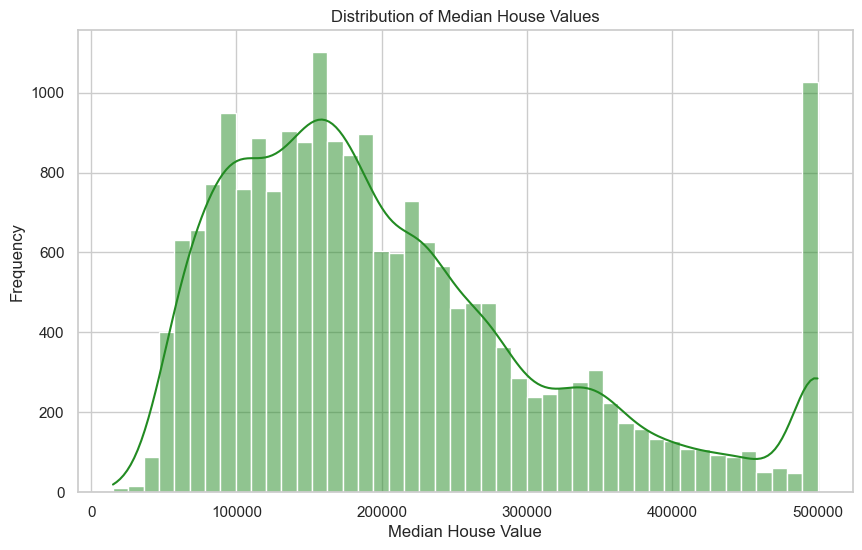

In [18]:
#Let us visualize the dependent variable 
sns.set(style="whitegrid") #background is white grid
plt.figure(figsize =(10,6)) #init figsize
sns.histplot(data['median_house_value'], color = 'forestgreen', kde=True) #
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency') 
plt.show() 
#we have a certain cluster of median house values that appear often. 70,000 to 200,000+
#I would be interested to also understand what makes very high prices desireable - proximity to ocean/etc?

In [20]:
#Inter-quantile-range to remove outliers 
#looking at the lowest 25th percentile 

Q1 = data['median_house_value'].quantile(0.25)
#print(Q1) = 119500 - 25% of observation falls bellow this value; 
Q3 = data['median_house_value'].quantile(0.75)
#print(Q3) = 264700 - top 25% of observations fall above this value;  
IQR = Q3 - Q1 #getting the middle part of the data 

#Define the bounds for the outliers 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

#Remove outliers 
data_no_outliers_1 = data[(data['median_house_value'] >= lower_bound) & (data['median_house_value'] <= upper_bound)]

#Check the shape df the data before and after removal of outliers 
print("Original data shape:", data.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


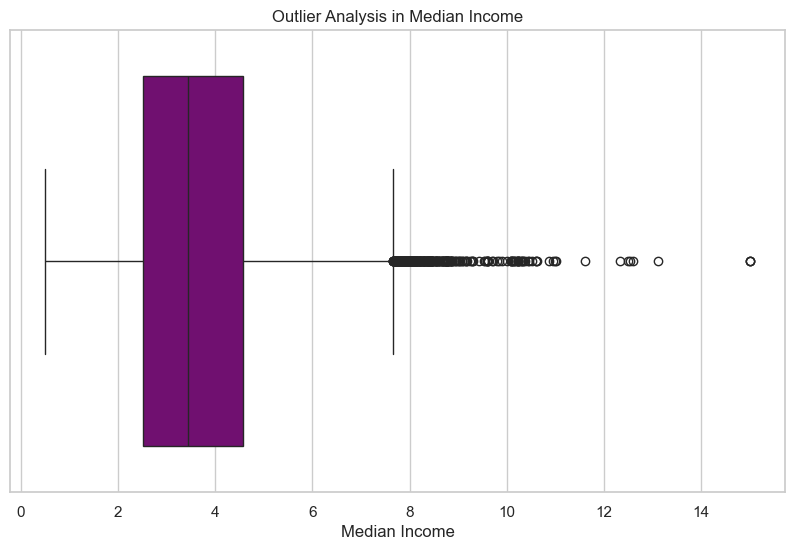

In [22]:
#Visualize outliers with a boxplot
plt.figure(figsize =(10,6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income") 
plt.show()
#There are quite a lot of data points which lie above the 75th quantile 

In [24]:
#Calculate Q1 and Q3 
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75) 
IQR = Q3 - Q1 #getting the middle part of the data 

#Define the bounds for the outliers 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

#Remove outliers and set conditions 
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

#Check the shape of the data before and after the removal of outliers 
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [26]:
data = data_no_outliers_2.copy()

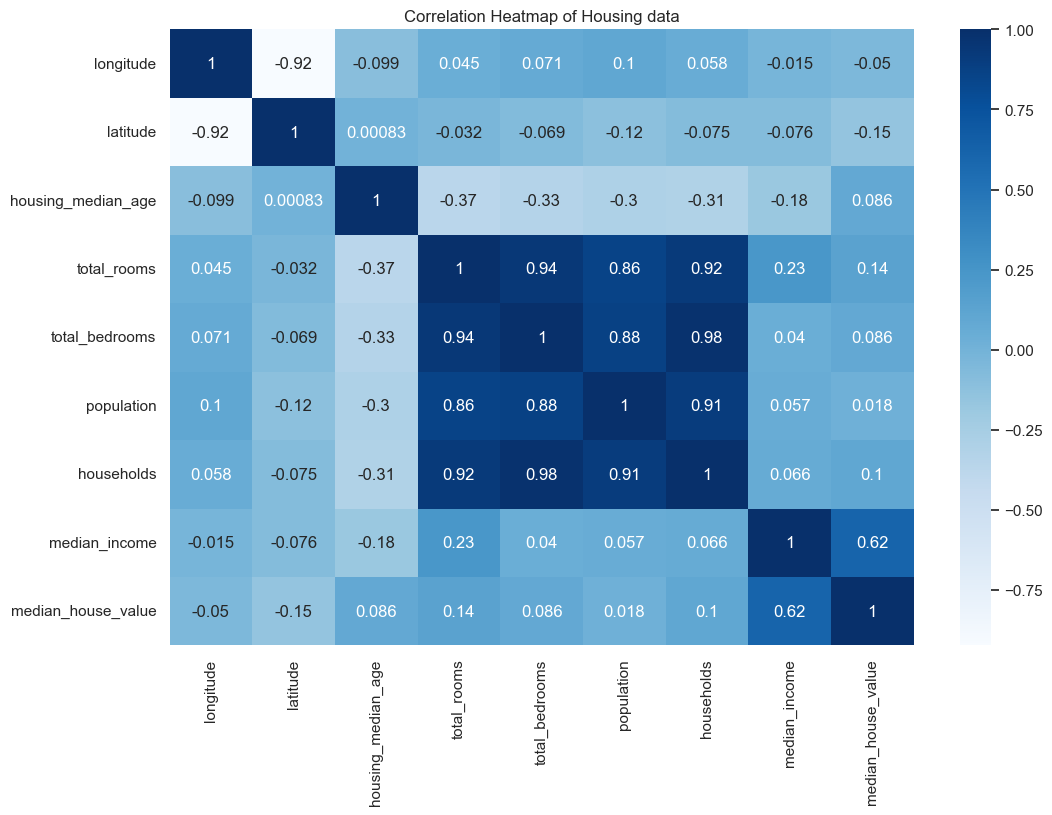

In [28]:
#Correlation heatmap with sns 
#This is good if we want to make sure we do not have perfect multicolinearity; 
numeric_data = data.select_dtypes(include=[float]) 
plt.figure(figsize=(12,8)) 
sns.heatmap(numeric_data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Housing data")
plt.show()
#Strong negative correlations: latitude and longitude 
#We are dealing with IVs which are highly correlated when it comes to total rooms, bedrooms, population, households, etc

In [30]:
#We have to drop some independent variables. 
#Let us drop the largest two. Let us do a quick visual check. 
#these variables are also not highly correlated with our DV. 
#data = data.drop("total_bedrooms", axis = 1)
if 'total_bedrooms' in data.columns:
    data = data.drop("total_bedrooms", axis=1)
else:
    print("Column 'total_bedrooms' is not in the DataFrame.") #good, it is dropped (no output)

In [32]:
print(list(data.columns))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [34]:
for column in ['ocean_proximity']:
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [36]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
ocean_proximity_dummies = ocean_proximity_dummies.astype(int) 
data = pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies #ocean proximity near inland are true;

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [38]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [40]:
data = data.drop('ocean_proximity_ISLAND', axis=1) #trying to avoid perfect multicolinearity

In [42]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


In [44]:
#Splitting data into train and test 
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [46]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target= ["median_house_value"]
X = data[features]
y = data[target]

#Split the data into a training set and a testing set
#test_size specifies the proportion of the data to be included in the test split 
#random_state ensures reproducibility of split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)
#test size is 20% of the data, and then train it on 80% of data 
#check size of splits 
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


In [48]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [50]:
#Adding a constant to the predictors because statsmodels' OLS doesn't include a deafult
X_train_const = sm.add_constant(X_train) #adds a constant column representing the intercept
X_train_const #adds an initial column of 1s. 

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [52]:
#Fit the 0LS model: 
model_fitted = sm.OLS(y_train, X_train_const).fit() #eval how the model is managing 
#in identifying the median house values; 

#Printing Summary 
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:55:02   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               


1) R-squared: Goodness of fit. Identify how good your model is. -> 0.59 (approx) -> all IVs are able to explain 59% of the entire set of variation; 
- More than half of the entire variation of this house I am able to explain.
=> Look at additional independent variables in order to increase the amount of information to explain via my model.
2) Adjusted R-squared.
- same as R-squared. The amount of variables I have included is good enough.
3) F-test
- Are my IVs able to explain the median house value? Too large or too small - all the IVs are jointly statistically significant.

- coef - direction of relationship (positive or negative)
a) number of rooms: if we add one more room to the total number of rooms, then the median house value will decrease by -2.6698.
b) housing median age -> very large positive relationship
- if one of these houses has one more additional year added to this age, then the house value would be higher by 846.46 dollars higher median house value;
c) Ocean proximity inland - coef -2.110 (approx). If all else is kept the same: if one block is located in inland is the other is not, it will decrease by 2.110.
- this is essentially measuring these effects within these variables separately;s
- have to interpret all the coefficients here!!

Standard errors: direct result of the 4th assumption which was violated; Standard error is large: heteroscedasticity issue. Longitutude and latitude; 


We can now use this fitted model to train on the data. 


In [56]:
X_test_const = sm.add_constant(X_test) #add the constant to the test pred.

#Making predictions on the test set 
test_predictions = model_fitted.predict(X_test_const) 
test_predictions 

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

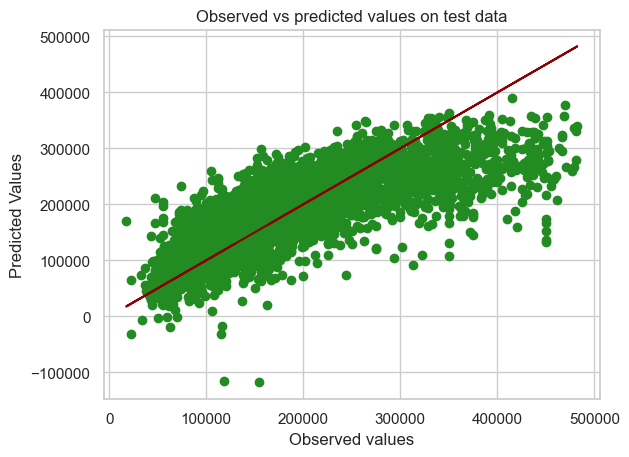

In [58]:
#Looking into the linearity assumption: 
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel("Observed values")
plt.ylabel("Predicted Values")
plt.title("Observed vs predicted values on test data")
plt.plot(y_test, y_test, color="darkred") #Line for perfect prediction (true values) 
plt.show()
#Model is linear in parameters;

In [60]:
#Assumption 2: Random Sample 
#Calcculating the mean of the residuals 
mean_residuals = np.mean(model_fitted.resid) 

print(f"The mean of the residuals is {np.round(mean_residuals,2)}") #round up to 2 decimals 
#after this point; 
#Residuals should be randomly scattered around zero without any systematic patterns; 

The mean of the residuals is -0.0


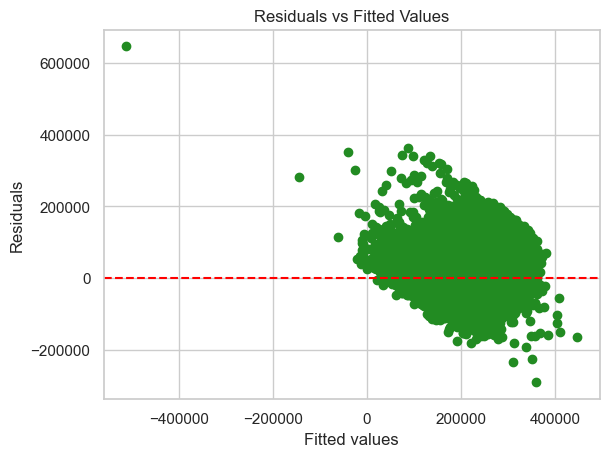

In [62]:
#Let us plot the residuals 
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()
#Taking residuals from fitted and comparing to fitted values. 
#The pattern is symmetric around zero => on average, the mean of the residuals is around zero. 
#we are dealing with a random sample; 
#we have violated this assumption; - GLS maybe for improving efficiency; 

In [72]:
#Assumption 3: Exogeneity 
#Using the Durbin-Wu-Hausman Test: find our whether you have exogeneity or endogeneity; 

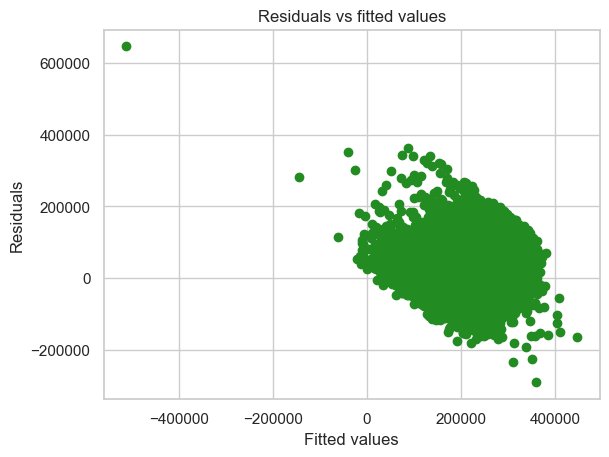

In [74]:
#Homoskedasiticiy - error terms should have a variance that is constant;
#Plotting the residuals:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs fitted values")
plt.show()

In [76]:
### Train/test/evaluatio with Sklearn 

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

#Fit the scaler on the training data and transfom it; 
X_train_scaled = scaler.fit_transform(X_train) 

#Apply the same transformation to the test data 
X_test_scaled = scaler.transform(X_test) 

In [70]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt 

#Create and fit the model 
lr = LinearRegression()
lr.fit(X_train_scaled, y_train) 

#Make predictions on the scaled test data 

LinearRegression()